In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import math as m

In [2]:
df = pd.read_csv("regularite-mensuelle-tgv-aqst.csv", encoding="latin-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [4]:
df.tail()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
8149,6/1/2023,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,...,80,35.446667,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286
8150,6/1/2023,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,...,36,76.688889,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667
8151,6/1/2023,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,...,13,97.394872,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286
8152,6/1/2023,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,...,96,47.424479,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828
8153,6/1/2023,National,VANNES,PARIS MONTPARNASSE,167,284,0,NaN,154,6.480628,...,34,49.740686,17,7,11.627907,39.534884,11.627907,18.604651,11.627907,6.976744


In [5]:
def clean_df_per_year(df):
    df = df.dropna(axis=1, how='all')
    df = df.drop("commentaires_retard_arrivee", axis=1) # str and not relevant for model
    df = df.drop("service", axis=1)
    df = df.drop("gare_depart", axis=1)
    df = df.drop("gare_arrivee", axis=1)

    new_date = []
    for line in df["date"]:
        month, day, year = line.split('/')
        year = int(year)
        # year -= 2018
        new_date.append(year)
    df["date"] = new_date
    return df

def clean_df_per_months(df):
    df = df.dropna(axis=1, how='all')
    df = df.drop("commentaires_retard_arrivee", axis=1) # str and not relevant for model
    df = df.drop("service", axis=1)
    df = df.drop("gare_depart", axis=1)
    df = df.drop("gare_arrivee", axis=1)

    new_date = []
    for line in df["date"]:
        month, day, year = line.split('/')
        month = int(month)
        new_date.append(month)
    df["date"] = new_date
    return df

clean_ds_years = clean_df_per_year(df)
clean_ds_months = clean_df_per_months(df)

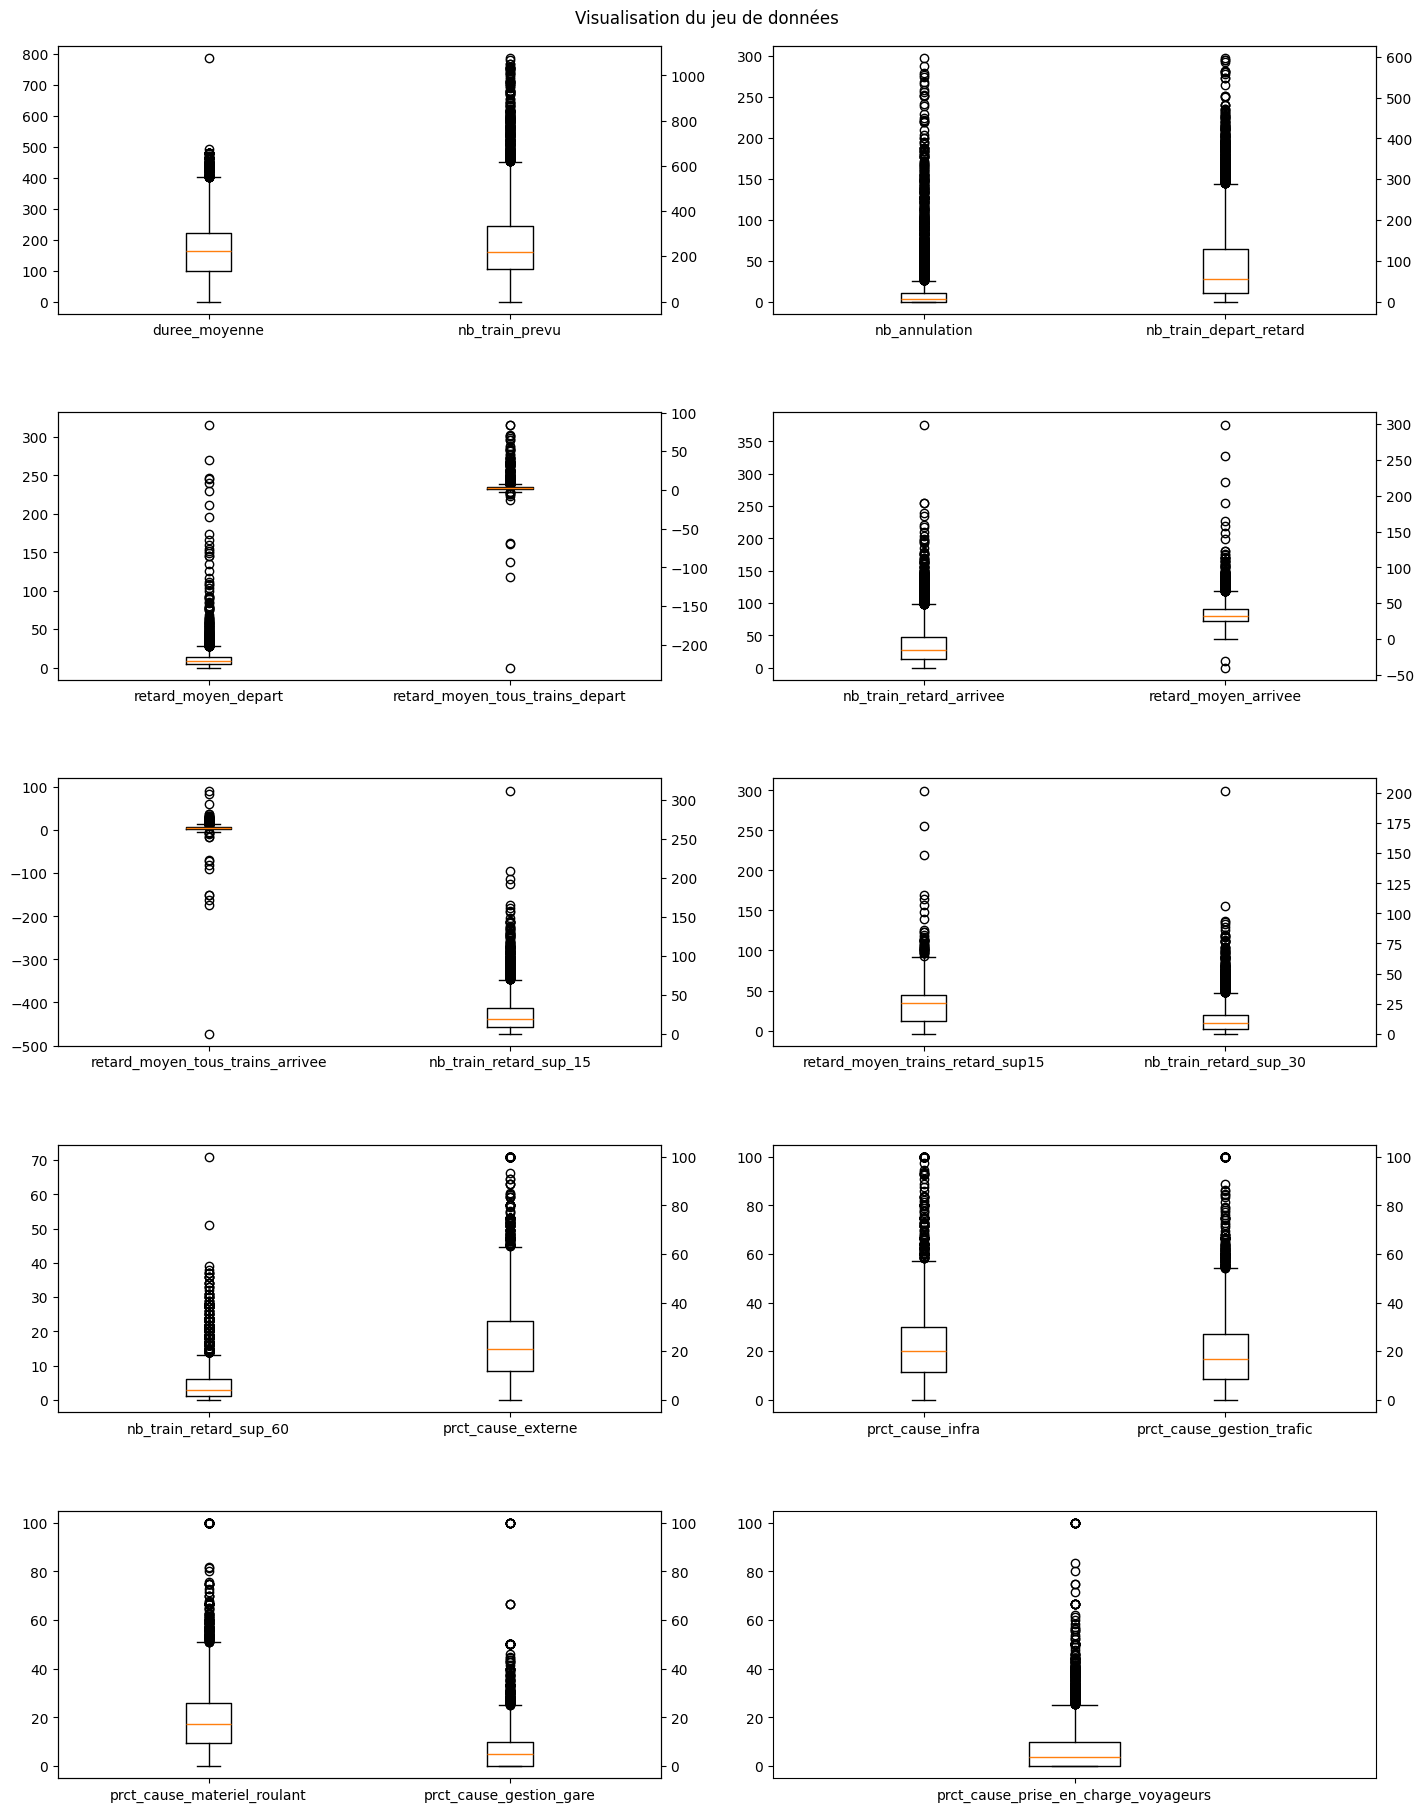

In [6]:
categorical_column = ["date"]
nb_cols = 2
nb_rows = m.ceil((len(clean_ds_years.columns)-len(categorical_column)) / 4) # two col per plot, 2 plot per rows


fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(15, 19))
fig.tight_layout(pad=5.0)
for i, col in enumerate(clean_ds_years.columns.drop(categorical_column)):
    plot_row = i // 4
    plot_col = (i%4)//2
    if i%2==0:
        ax1 = axes[plot_row, plot_col]
        if i<len(clean_ds_years.columns.drop(categorical_column))-1:
            ax2 = ax1.twinx()
        ax1.boxplot(clean_ds_years[col], positions=[1], labels=[col])
    else:
        ax2.boxplot(clean_ds_years[col], positions=[2], labels=[col])

plt.suptitle("Visualisation du jeu de données")
plt.show()

## Matrice de corrélations entre les variables

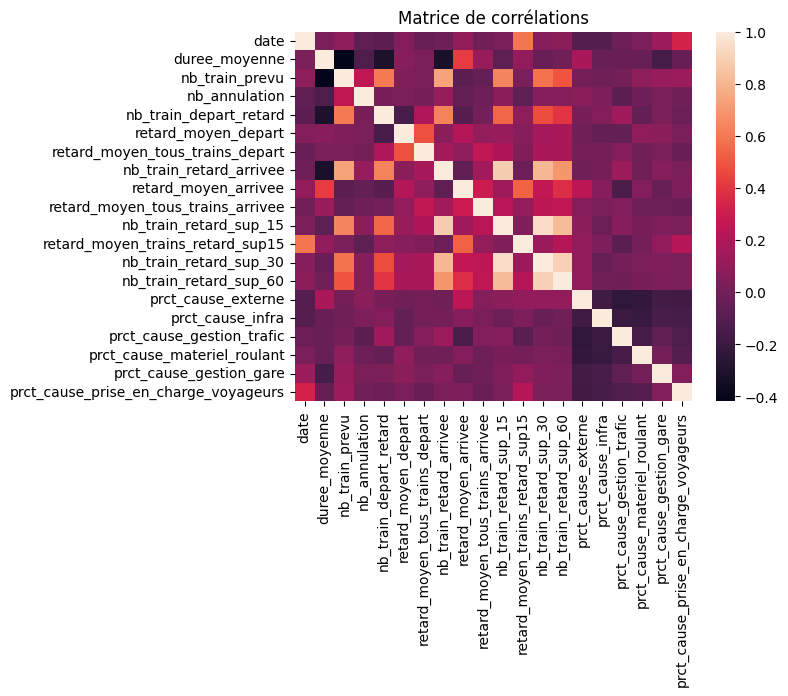

In [7]:
corr_matrix = clean_ds_years.corr()
sns.heatmap(corr_matrix)
plt.title("Matrice de corrélations")
plt.show()

In [8]:
mean_pearson_years = []
mean_pearson_months = []

for i, column in enumerate(clean_ds_years.columns):
    coeff_pearson_years,_ = scipy.stats.pearsonr(clean_ds_years["date"], clean_ds_years[column])
    coeff_pearson_months,_ = scipy.stats.pearsonr(clean_ds_months["date"], clean_ds_months[column])
    if i!= 0: 
        mean_pearson_years.append(coeff_pearson_years)
        mean_pearson_months.append(coeff_pearson_months)
    print(f"Pearson {column}, years = {coeff_pearson_years} | months = {coeff_pearson_months}")

print(f"Pearson absolu moyen, years = {np.mean(np.abs(mean_pearson_years))} | months = {np.mean(np.abs(mean_pearson_months))}")

Pearson date, years = 0.9999999999999784 | months = 0.9999999999999994
Pearson duree_moyenne, years = 0.022453469315633363 | months = 0.0058523550446367275
Pearson nb_train_prevu, years = 0.08876318401845414 | months = -0.022724390495755753
Pearson nb_annulation, years = -0.0679368875662559 | months = -0.10307646171992481
Pearson nb_train_depart_retard, years = -0.07590346314956566 | months = 0.09317125359226226
Pearson retard_moyen_depart, years = 0.05550433050114018 | months = -0.0356230019296542
Pearson retard_moyen_tous_trains_depart, years = -0.03649921819444501 | months = 0.03238697642619598
Pearson nb_train_retard_arrivee, years = -0.015885023653975067 | months = 0.04570682508001243
Pearson retard_moyen_arrivee, years = 0.09871946849799247 | months = -0.05891729776822856
Pearson retard_moyen_tous_trains_arrivee, years = -0.007780913405345462 | months = 0.010592995911815487
Pearson nb_train_retard_sup_15, years = 0.027440736399081473 | months = 0.04765062915073185
Pearson retard_

Pearson moyen par année : 0.10236454674950247
Pearson moyen par mois : 0.04442906256205636

Au vue des coefficients de Pearson pour chaque lignes, nous allons potentiellement privilégié les mois aux années.
En effet, nous cherchons à avoir des features qui ne sont pas corrélées entre elles, donc des features qui ont un coefficient de Pearson le plus faible possible.


In [9]:
corr_df = pd.DataFrame(corr_matrix.unstack().sort_values(ascending=False), columns=['pearson'])
corr_df = corr_df[corr_df['pearson'] < 1.0]
corr_df = corr_df.iloc[::2]

corr_df.head(20)

pearson
nb_train_retard_sup_15          nb_train_retard_sup_30            0.945495
nb_train_retard_sup_30          nb_train_retard_sup_60            0.896712
nb_train_retard_sup_15          nb_train_retard_arrivee           0.886350
nb_train_retard_sup_60          nb_train_retard_sup_15            0.819064
nb_train_retard_sup_30          nb_train_retard_arrivee           0.808876
nb_train_retard_arrivee         nb_train_prevu                    0.739420
                                nb_train_retard_sup_60            0.689843
nb_train_retard_sup_15          nb_train_prevu                    0.635154
nb_train_retard_arrivee         nb_train_depart_retard            0.632400
nb_train_prevu                  nb_train_depart_retard            0.602848
date                            retard_moyen_trains_retard_sup15  0.595142
nb_train_retard_sup_30          nb_train_prevu                    0.579491
nb_train_depart_retard          nb_train_retard_sup_15            0.543628
retard_moyen_arrivee            retard_moyen_trains_retard_sup15  0.529987
nb_train_prevu                  nb_train_retard_sup_60            0.492042
retard_moyen_tous_trains_depart retard_moyen_depart               0.481608
nb_train_depart_retard          nb_train_retard_sup_30            0.468747
duree_moyenne                   retard_moyen_arrivee              0.418651
nb_train_retard_sup_60          nb_train_depart_retard            0.391853
                                retard_moyen_arrivee              0.371302

In [10]:

def get_data_by_month(df):
    years_idx = {str(year): {str(i):[] for i in range(1, 13)} for year in range(2018, 2024)}
    
    s = {str(i):0 for i in range(2018, 2024)}
    for i, d in enumerate(df["date"].tolist()):
        month, day, year = d.split('/')
        s[year] += 1

        years_idx[str(year)][str(month)].append(i)

    years_df = {str(year): {str(i):[] for i in range(1, 13)} for year in range(2018, 2024)}
    for year in range(2018, 2024):
        for month in range(1, 13):
            years_df[str(year)][str(month)] = df.iloc[years_idx[str(year)][str(month)]]
    return years_df

def get_data_by_year(df):
    years_idx = {str(year): [] for year in range(2018, 2024)}
    
    s = {str(i):0 for i in range(2018, 2024)}
    for i, d in enumerate(df["date"].tolist()):
        month, day, year = d.split('/')
        s[year] += 1

        years_idx[str(year)].append(i)

    years_df = {str(year): [] for year in range(2018, 2024)}
    for year in range(2018, 2024):
            years_df[str(year)] = df.iloc[years_idx[str(year)]]
    return years_df

months_ds = get_data_by_month(df)        

In [11]:
list_stations = list(set(df["gare_depart"].tolist()))
list_stations.sort()
stations = {station:i for i, station in enumerate(list_stations)}

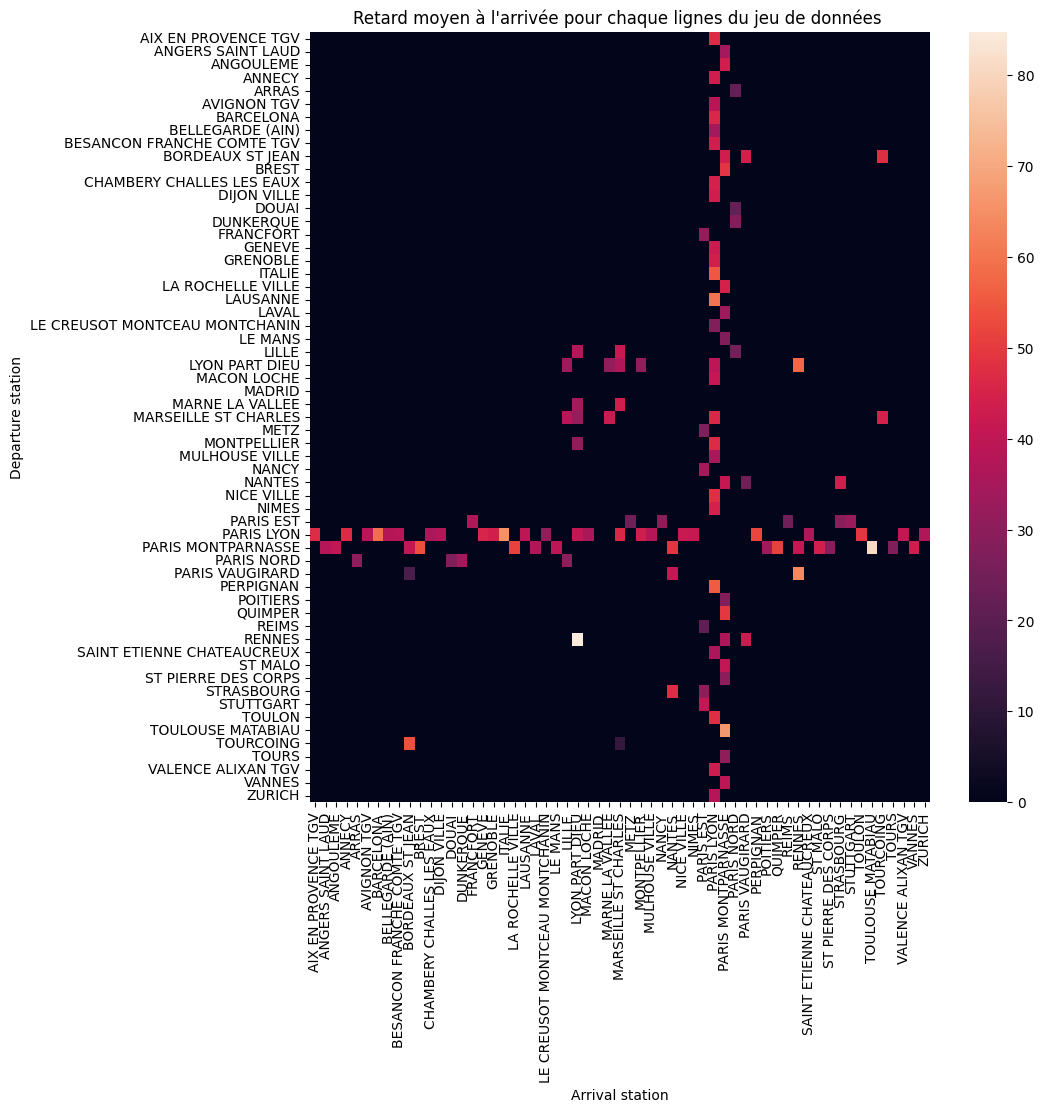

In [12]:

delay_arr = np.zeros((len(stations), len(stations)))

for idx in df.index:
    departure = stations[df["gare_depart"][idx]]
    arrival = stations[df["gare_arrivee"][idx]]

    perc_cancel = df["retard_moyen_arrivee"][idx]
    if delay_arr[departure, arrival] == 0:
        delay_arr[departure, arrival] = perc_cancel
    else:
        delay_arr[departure, arrival] = (perc_cancel + delay_arr[departure, arrival])/2



plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(delay_arr, xticklabels=list_stations, yticklabels=list_stations, annot=False, ax=ax);

# labels, title and ticks
ax.set_xlabel('Arrival station')
ax.set_ylabel('Departure station')
ax.set_title('Retard moyen à l\'arrivée pour chaque lignes du jeu de données ')

plt.show()

## Analyse de l'impact et des corrélation de la date sur les données

In [13]:
months = {"1":"January",
          "2":"February",
          "3":"March",
          "4":"April",
          "5":"May",
          "6":"June",
          "7":"July",
          "8":"August",
          "9":"September",
          "10":"October",
          "11":"November",
          "12":"December"}

months_ds = get_data_by_month(df)
train_plot = {str(year):[] for year in range(2018, 2024)}
delay_plot = {str(year):[] for year in range(2018, 2024)}
for year in months_ds:
    for month in range(1, 13):
        sub_df = months_ds[str(year)][str(month)]
        train_avg = np.mean(sub_df["nb_train_prevu"])
        delay_avg = np.mean(sub_df["retard_moyen_arrivee"])
        
        train_plot[year].append(train_avg)
        delay_plot[year].append(delay_avg)


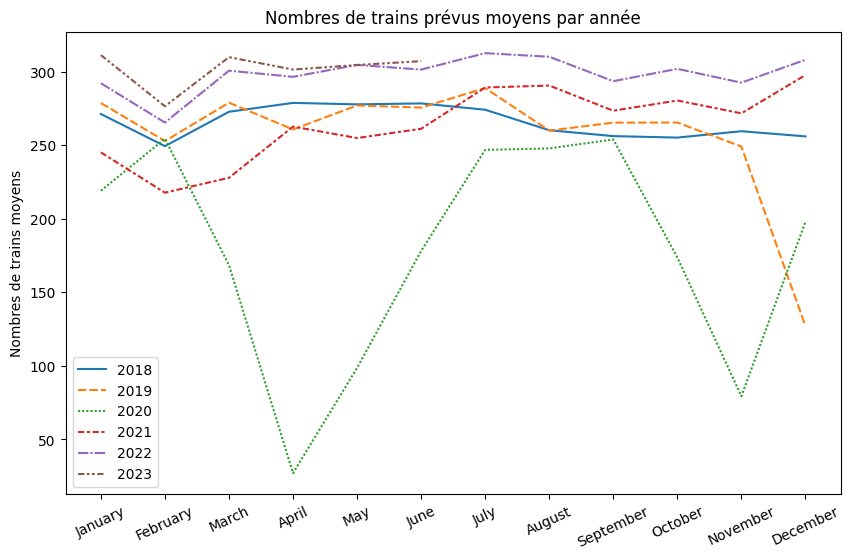

In [14]:
plt.figure(figsize=(10,6))

sns.lineplot(train_plot)

plt.xticks(ticks=list(range(0,12)), labels=list(months.values()), rotation=25)
plt.title("Nombres de trains prévus moyens par année")
plt.ylabel("Nombres de trains moyens")
plt.legend()
plt.show()

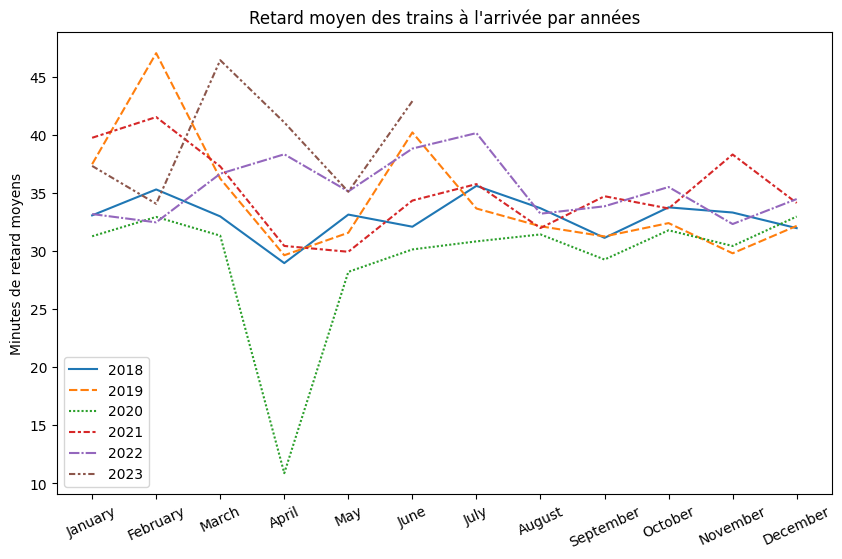

In [15]:
plt.figure(figsize=(10,6))

sns.lineplot(delay_plot)

plt.xticks(ticks=list(range(0,12)), labels=list(months.values()), rotation=25)
plt.title("Retard moyen des trains à l'arrivée par années")
plt.ylabel("Minutes de retard moyens")
plt.legend()
plt.show()

On décide d'enlever les données de mars, avril et mai 2018. Il y avait un confinement strict durant cette période. Le service de la SNCF était donc perturbé. Une crise comparable à celle du COVID ne peut pas être prévue avec les données que nous avons.

Nous enlevons donc ces données pour éviter de biaiser les données d'entraînement.

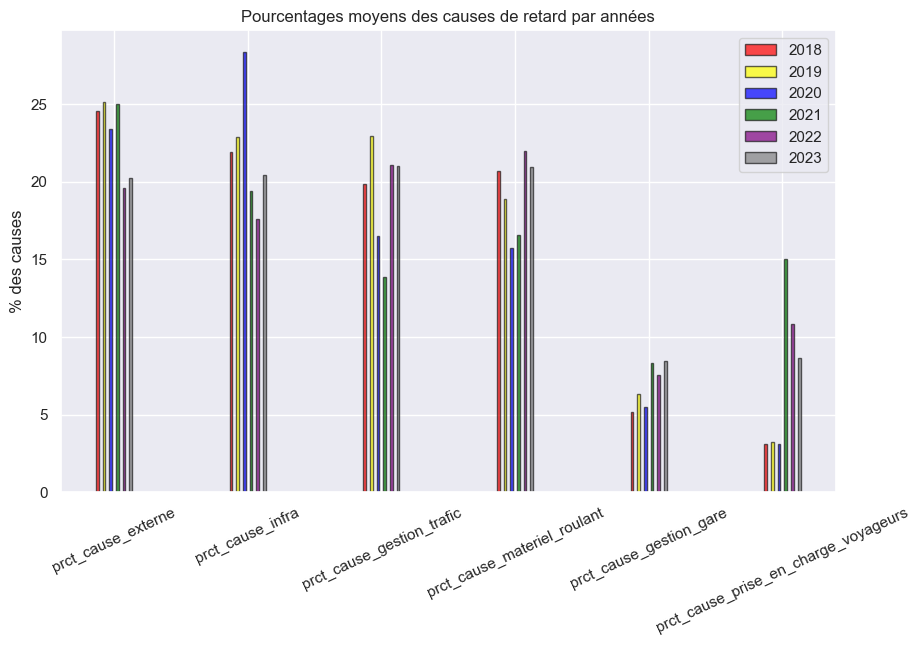

In [16]:
years_ds = get_data_by_year(df)

causes = ["prct_cause_externe", "prct_cause_infra", "prct_cause_gestion_trafic","prct_cause_materiel_roulant", "prct_cause_gestion_gare", "prct_cause_prise_en_charge_voyageurs"]

cause_perc = []
for cause in causes:
    list_cause = []
    for year in range(2018, 2024):
        list_cause.append(np.mean(years_ds[str(year)][cause]))
    cause_perc.append(list_cause)
sns.set(style="darkgrid")


plt.figure(figsize=(10,6))
x_positions = np.array([10, 20, 30, 40, 50, 60])*2

bar_width = 0.4
colors = ['red','yellow', 'blue', 'green', 'purple', 'grey']

for i, cause in enumerate(cause_perc):
    for year in range(len(cause)):
        pos = x_positions[i] + (year - 2.5)
        plt.bar(pos, cause_perc[i][year], bar_width,
                align='center',
                linewidth=1, edgecolor='k',
                color=colors[year], alpha=0.7,
                label=str(year+2018)
                )

plt.xticks(ticks=x_positions, labels=causes,rotation=25)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.ylabel("% des causes")
plt.title("Pourcentages moyens des causes de retard par années")
plt.legend(by_label.values(), by_label.keys())
plt.show()


Nous remarquons que le nombre d'années ne semblent pas influer sur la plupart des causes, sauf pour les deux dernières causes : 
<ul>
  <li>gestion des gares</li>
  <li>prise en charge de voyageurs</li>
</ul>



En prenant en compte les trois précédents diagrammes, nous décidons de garder seulement le mois  et non l'année. Les mois sont cycliques, ils se répétent chaque année. Alors que les années ne passent qu'une seule fois. 

In [17]:
mean_nbr_delay_dprt_station = {station:0 for station in list_stations}
mean_nbr_delay_arvl_station = {station:0 for station in list_stations}


for idx in df.index[1:]:
    dprt = df.iloc[idx]['gare_depart']
    arvl = df.iloc[idx]['gare_arrivee']
    mean_nbr_delay_dprt_station[dprt] = (df.iloc[idx]['nb_train_depart_retard'] + mean_nbr_delay_dprt_station[dprt])//2 if mean_nbr_delay_dprt_station[dprt] != 0 else df.iloc[idx]['nb_train_depart_retard']
    mean_nbr_delay_arvl_station[arvl] = (df.iloc[idx]['nb_train_retard_arrivee'] + mean_nbr_delay_arvl_station[arvl])//2 if mean_nbr_delay_arvl_station[arvl] != 0 else df.iloc[idx]['nb_train_retard_arrivee']
    

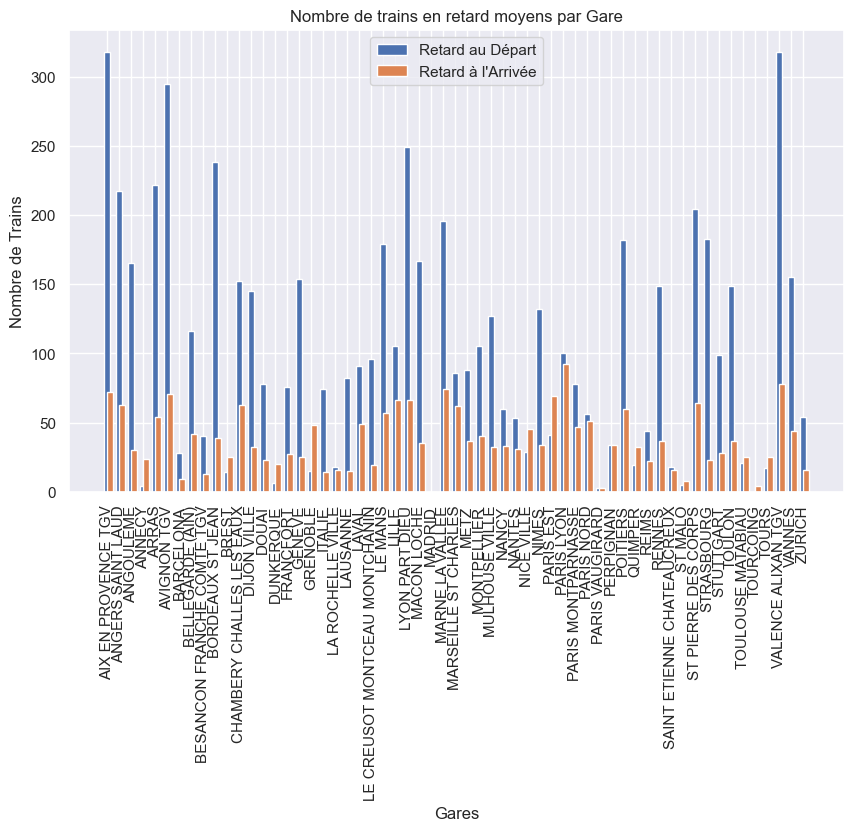

In [18]:
plt.figure(figsize=(10, 6))
bars1 = plt.bar(list_stations, mean_nbr_delay_dprt_station.values(), width=0.5, label='Retard au Départ')
bars2 = plt.bar(list_stations, mean_nbr_delay_arvl_station.values(), width=0.5, label="Retard à l'Arrivée", align="edge")

plt.xlabel('Gares')
plt.xticks(rotation=90)
plt.ylabel('Nombre de Trains')
plt.title('Nombre de trains en retard moyens par Gare')
plt.legend()
plt.show()

In [19]:
mean_time_delay_dprt_station = {station:0 for station in list_stations}
mean_time_delay_arvl_station = {station:0 for station in list_stations}


for idx in df.index[1:]:
    dprt = df.iloc[idx]['gare_depart']
    arvl = df.iloc[idx]['gare_arrivee']
    mean_time_delay_dprt_station[dprt] = (df.iloc[idx]['retard_moyen_depart'] + mean_time_delay_dprt_station[dprt])//2 if mean_time_delay_dprt_station[dprt] != 0 else df.iloc[idx]['retard_moyen_depart']
    mean_time_delay_arvl_station[arvl] = (df.iloc[idx]['retard_moyen_arrivee'] + mean_time_delay_arvl_station[arvl])//2 if mean_time_delay_arvl_station[arvl] != 0 else df.iloc[idx]['retard_moyen_arrivee']
    

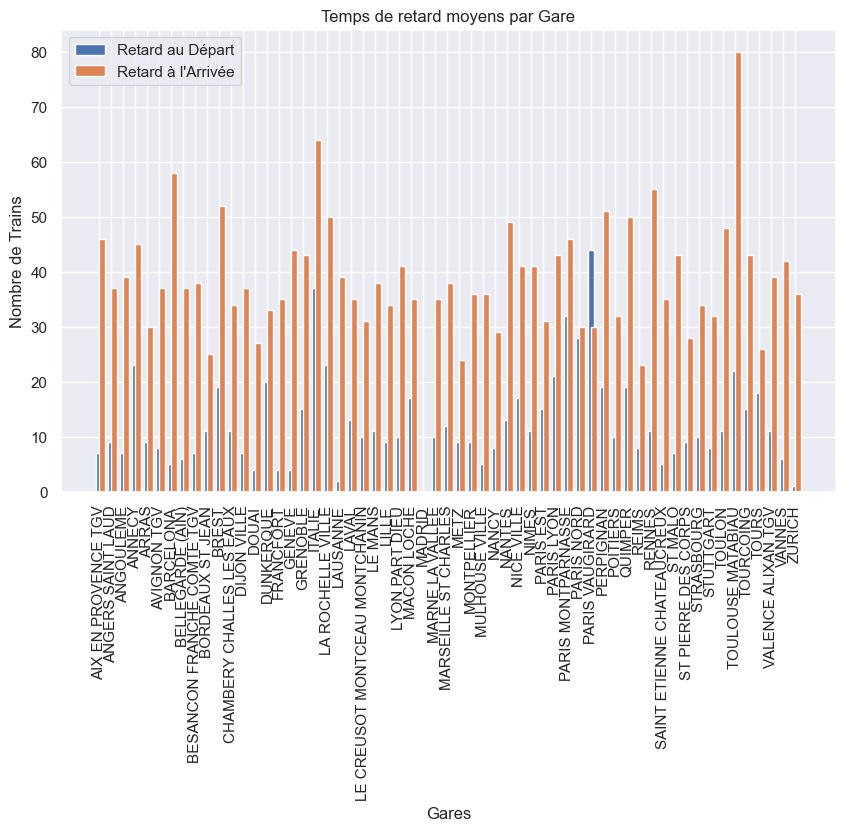

In [20]:
plt.figure(figsize=(10, 6))
bars1 = plt.bar(list_stations, mean_time_delay_dprt_station.values(), width=0.5, label='Retard au Départ')
bars2 = plt.bar(list_stations, mean_time_delay_arvl_station.values(), width=0.5, label="Retard à l'Arrivée", align="edge")

plt.xlabel('Gares')
plt.xticks(rotation=90)
plt.ylabel('Nombre de Trains')
plt.title('Temps de retard moyens par Gare')
plt.legend()
plt.show()

Sur le premier barplot, nous observons qu'il y a presque deux fois plus de train en retard au départ qu'à l'arrivée. 
Nous supposons donc que les trains en retard réussissent à rattraper leur retard et donc à arriver à l'heure.

Cependant, comme nous montre le deuxième barplot, les retards à l'arrivée, lorsqu'ils sont présents, sont bien plus importants que les retards au départ.
Nous décidons donc d'étudier les retards à l'arrivée puisqu'ils semblent plus intéressants à prédire que les retards au départ qui vont potentiellement être rattrapés.

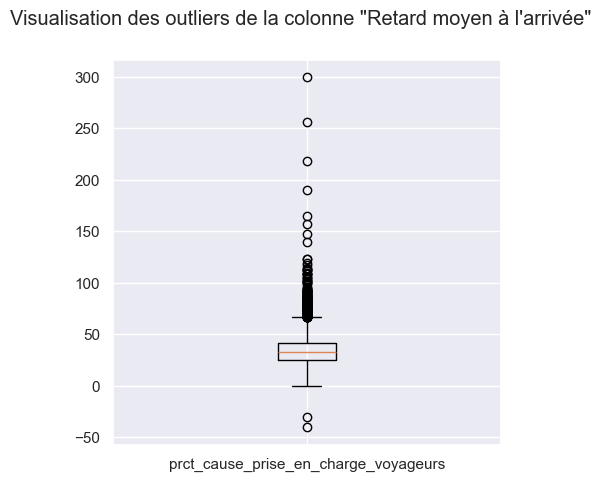

In [21]:
plt.figure(figsize=(5, 5))
plt.boxplot(df["retard_moyen_arrivee"], positions=[1], labels=[col])

plt.suptitle('Visualisation des outliers de la colonne "Retard moyen à l\'arrivée"')
plt.show()

Nous remarquons deux valeurs négatives. Nous supposons que ce sont des valeurs faussées et non des arrivées en avance

In [22]:
df[df["retard_moyen_arrivee"]<0]

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
2886,11/1/2019,National,MONTPELLIER,PARIS LYON,380,227,11,NaN,189,4.910406,...,44,34.677381,18,3,52.272727,13.636364,15.909091,15.909091,2.272727,0.00000
2889,11/1/2019,National,NIMES,PARIS LYON,224,226,11,NaN,190,8.765614,...,44,34.677381,18,3,46.774194,17.741935,14.516129,12.903226,3.225806,4.83871
